<a href="https://colab.research.google.com/github/wangxioanke/deep-learning-notebook/blob/main/ncoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.7.0


In [4]:
cd /content/sample_data

/content/sample_data


In [61]:
pip install Pillow==5.3.0

     |████████████████████████████████| 2.0 MB 15.5 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**图像增广系列函数**

In [2]:
from matplotlib import pyplot as plt

import os

file_dir = "/content/sample_data/picture/train/coal"
def file_name_walk(file_dir):
    for root, dirs, files in os.walk(file_dir):
        print("root", root)  # 当前目录路径
        print("dirs", dirs)  # 当前路径下所有子目录
        print("files", files)  # 当前路径下所有非目录子文件
        if root == '/content/sample_data/picture/train/coal':
          return files
files = file_name_walk(file_dir)
print(files)
for i in files:
  print(i)
  img = plt.imread('/content/sample_data/picture/train/coal/'+str(i))
  plt.imshow(img)

root /content/sample_data/picture/train/coal
dirs ['.ipynb_checkpoints']
files ['waitou_155_06-18-15-24-17.jpg', 'waitou_536_06-18-16-20-22.jpg', 'waitou_665_06-18-16-36-41.jpg', 'waitou_564_06-18-16-23-33.jpg', 'waitou_202_06-18-15-29-40.jpg', 'waitou_145_06-18-15-23-28.jpg', 'waitou_163_06-18-15-24-53.jpg', 'waitou_53_06-18-15-15-19.jpg', 'waitou_69_06-18-15-16-55.jpg', 'waitou_137_06-18-15-22-52.jpg', 'waitou_319_06-18-15-40-10.jpg', 'waitou_343_06-18-15-47-19.jpg', 'waitou_305_06-18-15-39-05.jpg', 'waitou_673_06-18-16-37-10.jpg', 'waitou_696_06-18-16-38-31.jpg', 'waitou_612_06-18-16-30-56.jpg', 'waitou_65_06-18-15-16-32.jpg', 'waitou_322_06-18-15-40-19.jpg', 'waitou_406_06-18-15-54-05.jpg', 'waitou_541_06-18-16-20-50.jpg', 'waitou_500_06-18-16-15-22.jpg', 'waitou_385_06-18-15-52-02.jpg', 'waitou_691_06-18-16-38-11.jpg', 'waitou_146_06-18-15-23-32.jpg', 'waitou_246_06-18-15-33-39.jpg', 'waitou_245_06-18-15-33-24.jpg', 'waitou_594_06-18-16-29-30.jpg', 'waitou_169_06-18-15-25-17.jpg',

OSError: ignored

**左右翻转**

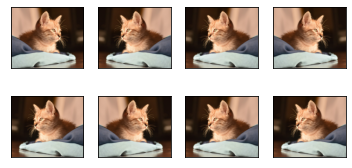

In [6]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

apply(img, tf.image.random_flip_left_right)

**上下翻转**

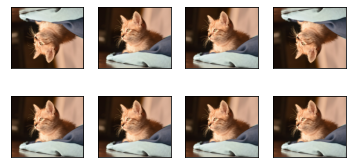

In [7]:
apply(img, tf.image.random_flip_up_down)

**随机采样面积，避免模型对位置的敏感度**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c0383b590>,
      dtype=object)

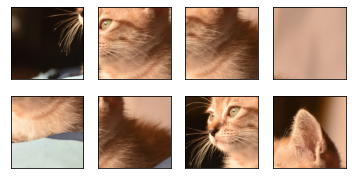

In [8]:
aug=tf.image.random_crop
num_rows=2
num_cols=4
scale=1.5
crop_size=200

Y = [aug(img, (crop_size, crop_size, 3)) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)

**变换光亮**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c035fa990>,
      dtype=object)

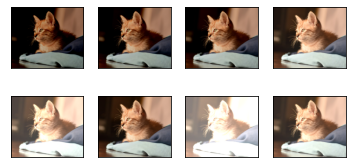

In [9]:
aug=tf.image.random_brightness
num_rows=2
num_cols=4
scale=1.5
max_delta=0.5

Y = [aug(img, max_delta) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)

**变换色彩**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c033a6fd0>,
      dtype=object)

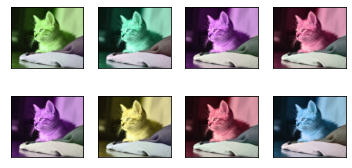

In [10]:
aug=tf.image.random_hue
num_rows=2
num_cols=4
scale=1.5
max_delta=0.5

Y = [aug(img, max_delta) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)

In [2]:
!pip install wget

In [ ]:
'''
import os
import zipfile
import wget


def download_data():
    data = os.getcwd()+'/data'
    base_url = 'https://apache-mxnet.s3-accelerate.amazonaws.com/'
    wget.download(
        base_url + 'gluon/dataset/hotdog.zip',
        data)

    with zipfile.ZipFile('data', 'r') as z:
        z.extractall(os.getcwd())

download_data()
'''


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd /content/sample_data

/content/sample_data


**解压文件**

In [44]:
import zipfile
import os
with zipfile.ZipFile('picture2.zip', 'r') as z:
        z.extractall(os.getcwd())

In [41]:
cd picture/train

/content/sample_data/picture/train


In [43]:
cd /home

/home


In [45]:
import pathlib
import numpy as np
import tensorflow as tf
train_dir = '/content/sample_data/picture/train'
test_dir = '/content/sample_data/picture/test'
train_dir = pathlib.Path(train_dir)
train_count = len(list(train_dir.glob('*/*.jpg')))
test_dir = pathlib.Path(test_dir)
test_count = len(list(test_dir.glob('*/*.jpg')))

CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != 'LICENSE.txt' and item.name[0] != '.'])
CLASS_NAMES

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir), 
                                                    batch_size=BATCH_SIZE,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    shuffle=True,
                                                    classes = list(CLASS_NAMES))

test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                    batch_size=BATCH_SIZE,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    shuffle=True,
                                                    classes = list(CLASS_NAMES))

Found 1378 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


In [46]:
print(CLASS_NAMES)

['gangue' 'coal']


In [48]:
!pip install pillow --upgrade

In [47]:
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(15):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')


image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

UnidentifiedImageError: ignored

In [20]:
# 下载模型
import tensorflow as tf

ResNet50 = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', input_shape=(224,224,3))
for layer in ResNet50.layers:
    layer.trainable = False
net = tf.keras.models.Sequential()
net.add(ResNet50)
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(2, activation='softmax'))

In [21]:
net.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = net.fit_generator(
                    train_data_gen,
                    steps_per_epoch=10,
                    epochs=10,
                    validation_data=test_data_gen,
                    validation_steps=10
                    )

net.save("mymodel")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


UnidentifiedImageError: ignored

In [36]:
from PIL import Image
reconstructed_model = tf.keras.models.load_model("mymodel")

test_dir = "/content/test"
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                           batch_size=1,
                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                          shuffle=True,
                          classes = list(CLASS_NAMES))
predict_np = reconstructed_model.predict(test_data_gen) # 不是，是

Found 400 images belonging to 2 classes.


In [38]:
for i in predict_np:
  print(i)

print(np.argmax(predict_np[0]))

[0.535288   0.46471202]
[0.5118031  0.48819694]
[0.5352932 0.4647068]
[0.532796 0.467204]
[0.52996165 0.47003838]
[0.5344809  0.46551898]
[0.53527814 0.46472183]
[0.5048515  0.49514845]
[0.5343752  0.46562475]
[0.52305955 0.4769405 ]
[0.5352966 0.4647034]
[0.47264257 0.5273574 ]
[0.53529686 0.46470308]
[0.5351181  0.46488193]
[0.4931157 0.5068843]
[0.535296   0.46470395]
[0.53529686 0.46470314]
[0.53529686 0.46470308]
[0.5323806  0.46761942]
[0.53529686 0.46470308]
[0.5352764  0.46472353]
[0.5021144  0.49788553]
[0.5319308  0.46806917]
[0.52791166 0.4720883 ]
[0.5232098  0.47679016]
[0.47964564 0.52035433]
[0.5221053 0.4778947]
[0.51140773 0.48859224]
[0.53529686 0.46470314]
[0.51227224 0.48772776]
[0.5041969 0.4958031]
[0.53515106 0.46484894]
[0.5093205  0.49067953]
[0.4934635 0.5065365]
[0.52868783 0.4713122 ]
[0.53529686 0.46470308]
[0.5352943  0.46470565]
[0.5349415 0.4650585]
[0.49804503 0.50195503]
[0.5352664  0.46473366]
[0.481868   0.51813203]
[0.49730977 0.5026903 ]
[0.5352956

In [ ]:
# batchsize批梯度下降法
